/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2024-06-03 19:46:33,753 - qm - INFO     - Starting session: 0ce0fc70-72c1-4570-8a0f-44c96282fc2a
Circuit context


/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/q_env_config.py:110: UserWarning: No backend was provided, State vector simulation will be used
  warnings.warn("No backend was provided, State vector simulation will be used")


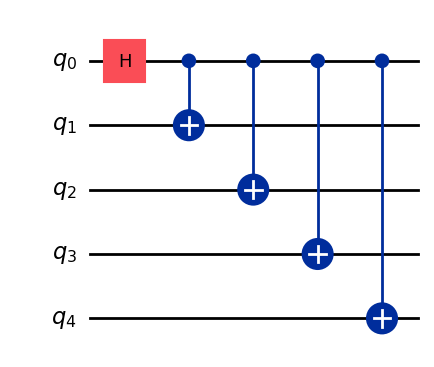

In [1]:
%matplotlib inline
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)
from template_configurations.qiskit.gate_level import (
    q_env_config as gate_q_env_config,
    circuit_context,
)
from quantumenvironment import QuantumEnvironmentV2
from context_aware_quantum_environment import ContextAwareQuantumEnvironmentV2
from gymnasium.wrappers import RescaleAction, ClipAction

circuit_context.draw("mpl")

In [2]:
use_context = False
if use_context:
    q_env = ContextAwareQuantumEnvironmentV2(
        gate_q_env_config, circuit_context, training_steps_per_gate=250
    )
else:
    q_env = QuantumEnvironmentV2(gate_q_env_config)
rescaled_env = RescaleAction(ClipAction(q_env), -1.0, 1.0)

/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/helper_functions.py:1817: UserWarning: No Backend was provided, using default values for dt, coupling_map, basis_gates and instruction_durations
  warnings.warn(


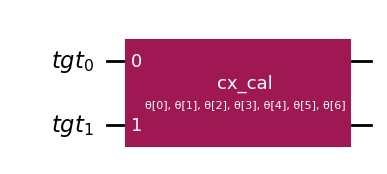

In [3]:
q_env.circuits[0].draw("mpl", style="iqp")

In [4]:
fig = None
if use_context:
    fig = q_env.circuit_context.draw("mpl")
fig

In [5]:
from helper_functions import load_from_yaml_file
from pathlib import Path

# Change the file_name to the name of the agent configuration file and specify the file location
file_name = "agent_config.yaml"
file_location = Path.cwd().parent.parent.parent / "template_configurations" / file_name

agent_config = load_from_yaml_file(file_location)

In [6]:
# from ppo import CustomPPO

# ppo_agent = CustomPPO(agent_config, rescaled_env)

In [7]:
from ppoV2 import CustomPPOV2

ppo_agent = CustomPPOV2(agent_config, rescaled_env)

In [8]:
q_env.layout

[Layout({
 0: Qubit(QuantumRegister(2, 'tgt'), 0),
 1: Qubit(QuantumRegister(2, 'tgt'), 1)
 })]

In [9]:
from helper_functions import load_from_yaml_file

agent_config = load_from_yaml_file('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/agent_config.yaml')

# ppo_agent = make_train_ppo(agent_config, q_env)

training_config = {
    'training_mode': "Normal", # "hardware_constraint_use_case",
    'training_details': {
        'total_updates': 100,
        # 'max_hardware_runtime': 1e4,
        "target_fidelities": [0.90, 0.999, 0.9999],
        "lookback_window": 10,
        "anneal_learning_rate": True, # TODO: Anneal it down to predefined lowest value, i.e., 5e-5
        "std_actions_eps": 1e-2,
    },   
}

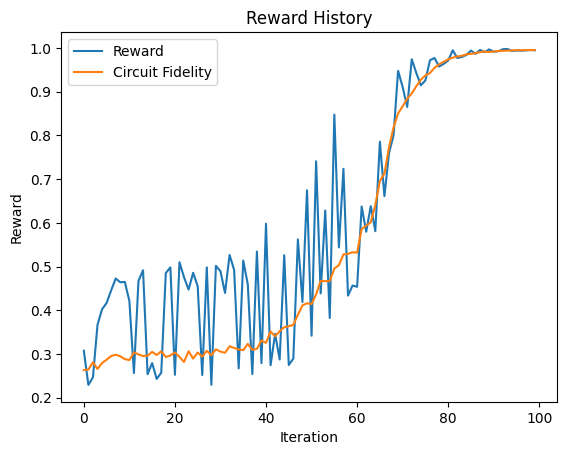

100%|██████████| 100/100 [00:38<00:00,  2.57it/s]


{'avg_reward': [0.30728016825225274,
  0.22901147042893832,
  0.2462998400729195,
  0.366118287781175,
  0.402126077681619,
  0.4166006625146742,
  0.4454279055059842,
  0.4726375211913897,
  0.46399144376088364,
  0.46468953343177044,
  0.42137499623178504,
  0.25616685423749175,
  0.4672195492793766,
  0.49147213492492525,
  0.2534914550357812,
  0.27901866161199296,
  0.24260737533196094,
  0.2572452256556379,
  0.48504248103456116,
  0.4981045334273661,
  0.2520977787380583,
  0.5097748281817922,
  0.4755382354805542,
  0.44733021134600287,
  0.4856696807552157,
  0.4550498361237834,
  0.251581685325168,
  0.49817278255895253,
  0.22934789543322298,
  0.501531892765808,
  0.48931902148811224,
  0.43947055832544835,
  0.5266454929431474,
  0.4922408634230105,
  0.2668451824528818,
  0.513594009068332,
  0.4593806186204979,
  0.2538275226957164,
  0.5343538517331332,
  0.2790180449329611,
  0.5978989023072874,
  0.27399683921417456,
  0.3457520463672475,
  0.28722049218720436,
  0.52

In [10]:
ppo_agent.train(training_config, plot_real_time=True, print_debug=True, num_prints=1)